In [6]:
# Create GAN for independent and identically distributed data

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import secrets


class GAN:
    def __init__(self, seq_len=11, latent_dim = 50, key1_len = 5, key2_len = 5):
        
        
        self.seq_len = seq_len
        self.latent_dim = latent_dim
        # self.tapped_1 = np.array([4, 5])
        # self.tapped_2 = np.array([4, 5])
        # self.key1_len = key1_len
        # self.key2_len = key2_len
        
        seed = secrets.randbits(128)
        self.rng = np.random.default_rng(seed)
        self.build_generator()
        self.build_discriminator()
        self.build_gan()
        # print(self.P)
    
    def generate_real_samples(self, n_samples):
        # key1 = self.rng.binomial(1, 0.5, (n_samples, self.key1_len))
        # key2 = self.rng.binomial(1, 0.5, (n_samples, self.key2_len))
        # print(list(zip(key1, key2)))
        # X = np.array([[] for _ in range(n_samples)])
        # # print(X.shape)
        # for _ in range(self.seq_len):
        #     next_1 = np.bitwise_xor.reduce(key1[:, self.tapped_1 - 1], axis=1)
        #     next_2 = np.bitwise_xor.reduce(key2[:, self.tapped_2 - 1], axis=1)
        #     key1 = np.roll(key1, 1, axis=1)
        #     key2 = np.roll(key2, 1, axis=1)
        #     key1[:, 0] = next_1
        #     key2[:, 0] = next_2
        #     # print(next_1.shape, next_2.shape)
        #     X = np.append(X, (next_1 ^ next_2).reshape(-1, 1), axis=1)
        #     # print(X.shape)
        # # X = np.array(X)
        # X = X.reshape(n_samples, self.seq_len, 1)

        X = []
        for i in range(1000):
            initial_key = np.binary_repr(i, width=10)
            initial_key = np.array([int(x) for x in initial_key])
            key1 = initial_key[:5]
            key2 = initial_key[5:]
            lst = []
            for j in range(self.seq_len + 1):
                nxt1 = key1[0] ^ key1[1]
                nxt2 = key2[0] ^ key2[2]
                nxt = nxt1 ^ nxt2
                lst.append(nxt)
                key1 = np.roll(key1, -1)
                key2 = np.roll(key2, -1)
                key1[-1] = nxt1
                key2[-1] = nxt2
            lst = np.array(lst)
            X.append(lst[:-1])
            
        X = np.array(X)

            
        
        
        y = np.ones((n_samples, 1)) * 0.9
        return X, y

    def generate_real_samples_true(self, n_samples):
        # key1 = self.rng.binomial(1, 0.5, (n_samples, self.key1_len))
        # key2 = self.rng.binomial(1, 0.5, (n_samples, self.key2_len))
        # print(list(zip(key1, key2)))
        # X = np.array([[] for _ in range(n_samples)])
        # # print(X.shape)
        # for _ in range(self.seq_len):
        #     next_1 = np.bitwise_xor.reduce(key1[:, self.tapped_1 - 1], axis=1)
        #     next_2 = np.bitwise_xor.reduce(key2[:, self.tapped_2 - 1], axis=1)
        #     key1 = np.roll(key1, 1, axis=1)
        #     key2 = np.roll(key2, 1, axis=1)
        #     key1[:, 0] = next_1
        #     key2[:, 0] = next_2
        #     # print(next_1.shape, next_2.shape)
        #     X = np.append(X, (next_1 ^ next_2).reshape(-1, 1), axis=1)
        #     # print(X.shape)
        # # X = np.array(X)
        # X = X.reshape(n_samples, self.seq_len, 1)

        X = []
        for i in range(1024):
            initial_key = np.binary_repr(i, width=10)
            initial_key = np.array([int(x) for x in initial_key])
            key1 = initial_key[:5]
            key2 = initial_key[5:]
            lst = []
            for j in range(self.seq_len + 1):
                nxt1 = key1[0] ^ key1[1]
                nxt2 = key2[0] ^ key2[2]
                nxt = nxt1 ^ nxt2
                lst.append(nxt)
                key1 = np.roll(key1, -1)
                key2 = np.roll(key2, -1)
                key1[-1] = nxt1
                key2[-1] = nxt2
            lst = np.array(lst)
            X.append(lst[:-1])
            
        X = np.array(X)

            
        
        
        y = np.ones((n_samples, 1)) * 0.9
        return X, y
    
    def generate_fake_samples(self, n_samples):
        X = self.generator.predict(np.random.normal(0, 1, (n_samples, self.latent_dim)))
        y = np.zeros((n_samples, 1))
        return X, y
    
    def calculate_P(self, n_samples):
        X, _ = self.generate_fake_samples(n_samples)
        return np.mean(X, axis=0) 
    
    def build_generator(self):
        self.generator = tf.keras.models.Sequential([
            tf.keras.layers.Dense(self.seq_len * 2000, input_shape=(self.latent_dim,)),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Reshape((self.seq_len, 2000)),
            # tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100)),
            # (tf.keras.layers.LSTM(100, return_sequences=True)),
            # tf.keras.layers.LSTM(100, return_sequences=True),
            # tf.keras.layers.LSTM(100, return_sequences=True),
            tf.keras.layers.Dense(100, activation='relu'),
            
            tf.keras.layers.Dense(1, activation='sigmoid'),
        ])
    def summarize_generator(self):
        self.generator.summary()

    def build_discriminator(self):
        self.discriminator = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(self.seq_len, 1)),
            tf.keras.layers.Dense(5000, activation='relu'),
            # tf.keras.layers.Dense(1000, activation='relu'),
            tf.keras.layers.Dense(500, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),
            # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, input_shape=(self.seq_len, 1), return_sequences=True)),
            # tf.keras.layers.Dropout(0.5),
            # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
            # tf.keras.layers.Dropout(0.5),
            # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=False)),
            # tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid'),
        ])
        self.discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    def summarize_discriminator(self):
        self.discriminator.summary()
    
    def build_gan(self):
        self.discriminator.trainable = False
        self.gan = tf.keras.models.Sequential([
            self.generator,
            self.discriminator,
        ])
        self.gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())
        
    def train(self, epochs = 10, batch_size = 64, data_size = 1000):
        l1_hist = []
        l2_hist = []
        l3_hist = []
        ac1_hist = []
        ac2_hist = []
        # total = data_size//batch_size
        total = 100000//batch_size
        train_data_x, train_data_y = self.generate_real_samples(data_size)
        for i in range(epochs):
            print("Iteration:", i)
            # Train the discriminator
            
            for k in range(total):
                print(k,"/",total,end="\r")
                idx = np.random.randint(0, data_size, batch_size//2)
                X_real, y_real = train_data_x[idx], train_data_y[idx]
                X_fake, y_fake = self.generate_fake_samples(batch_size//2)
                

                l1, ac1 = self.discriminator.train_on_batch(X_real, y_real)
                l2, ac2 = self.discriminator.train_on_batch(X_fake, y_fake)
                
                X_fake = np.random.normal(0, 1, (batch_size, self.latent_dim))
                y_fake = np.ones((batch_size, 1))
                l3 = self.gan.train_on_batch(X_fake, y_fake)
                
                l1_hist.append(l1)
                l2_hist.append(l2)
                l3_hist.append(l3)
                ac1_hist.append(ac1)
                ac2_hist.append(ac2)
                
            # Show plots of the losses and accuracies
            # calc_p = self.calculate_P(100000)
            # print(calc_p)
            pred = self.generator.predict(np.random.normal(0, 1, (1, self.latent_dim)))
            print(pred)
            print(self.discriminator.predict(pred))
            # print("Loss:",np.mean(np.abs(calc_p - self.P)))
            if i % 10 >= 0:
                plt.figure(figsize=(10, 10))
                plt.subplot(2, 1, 1)
                plt.plot(l1_hist, label="Discriminator(Real)")
                plt.plot(l2_hist, label="Discriminator(Fake)")
                plt.plot(l3_hist, label="Generator")
                plt.legend()
                plt.title("Losses")
                plt.subplot(2, 1, 2)
                plt.plot(ac1_hist, label="Accuracy(Real)")
                plt.plot(ac2_hist, label="Accuracy(fake)")
                plt.legend()
                plt.title("Accuracies")
                plt.show()
                l1_hist = []
                l2_hist = []
                l3_hist = []
                ac1_hist = []
                ac2_hist = []

In [7]:
gan = GAN()
gan.summarize_generator()
gan.summarize_discriminator()


# print(.shape)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 22000)             1122000   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 22000)             0         
                                                                 
 reshape_2 (Reshape)         (None, 11, 2000)          0         
                                                                 
 dense_17 (Dense)            (None, 11, 100)           200100    
                                                                 
 dense_18 (Dense)            (None, 11, 1)             101       
                                                                 
Total params: 1,322,201
Trainable params: 1,322,201
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
______________________

In [8]:
print(gan.generate_real_samples(1)[0].shape)

(1000, 11)


Iteration: 0


2024-03-13 21:48:53.077413: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55758db5afb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-13 21:48:53.077479: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-03-13 21:48:53.089391: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-13 21:48:53.224607: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


[[[1.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [1.0000000e+00]
  [0.0000000e+00]
  [1.9721765e-02]
  [3.9646427e-13]
  [1.7346892e-20]
  [3.6870372e-18]
  [9.9999774e-01]
  [1.0000000e+00]]]
[[0.02613398]]


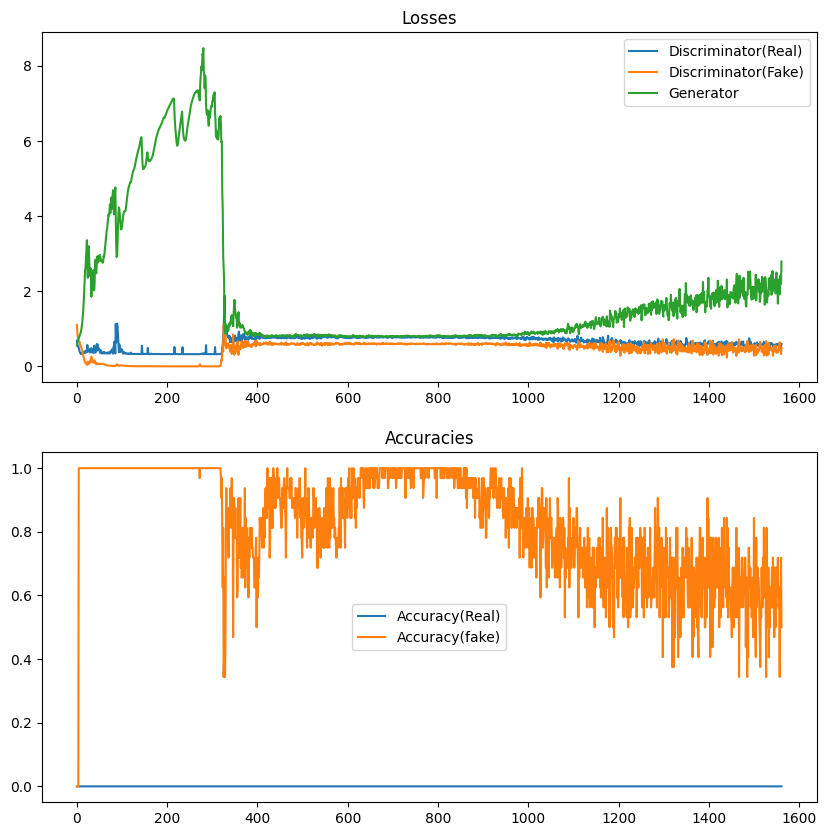

Iteration: 1
[[[3.0791432e-18]
  [1.0000000e+00]
  [0.0000000e+00]
  [4.9460335e-32]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [0.0000000e+00]
  [5.7495426e-27]
  [1.0000000e+00]]]
[[0.43602625]]


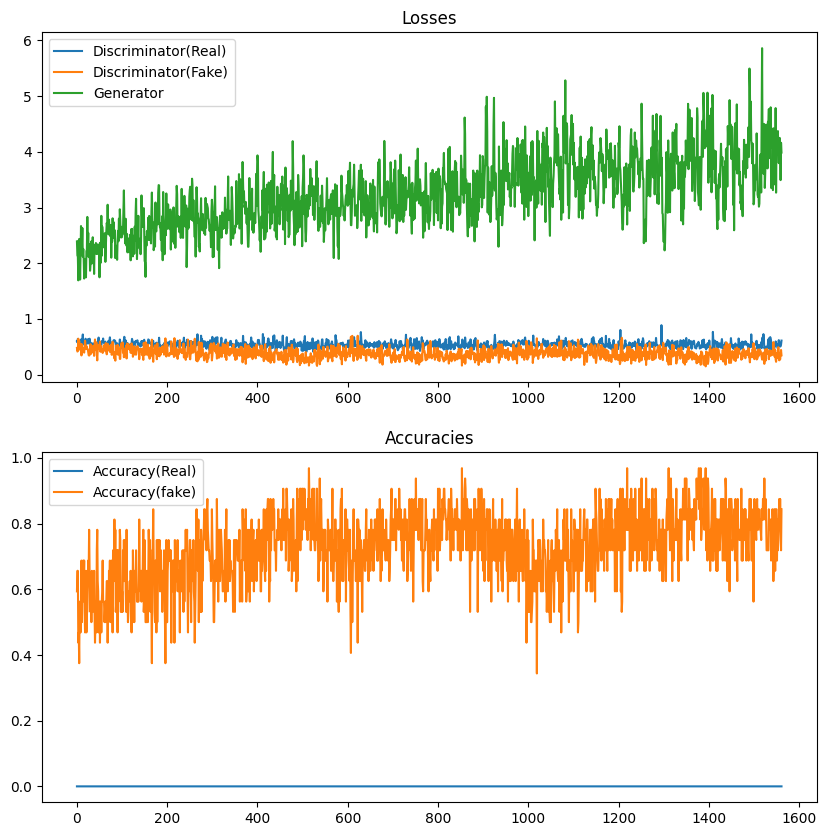

Iteration: 2
[[[9.9999928e-01]
  [2.0648642e-01]
  [1.0000000e+00]
  [3.4103756e-14]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.2810971e-19]
  [1.0000000e+00]
  [1.0000000e+00]]]
[[1.579637e-05]]


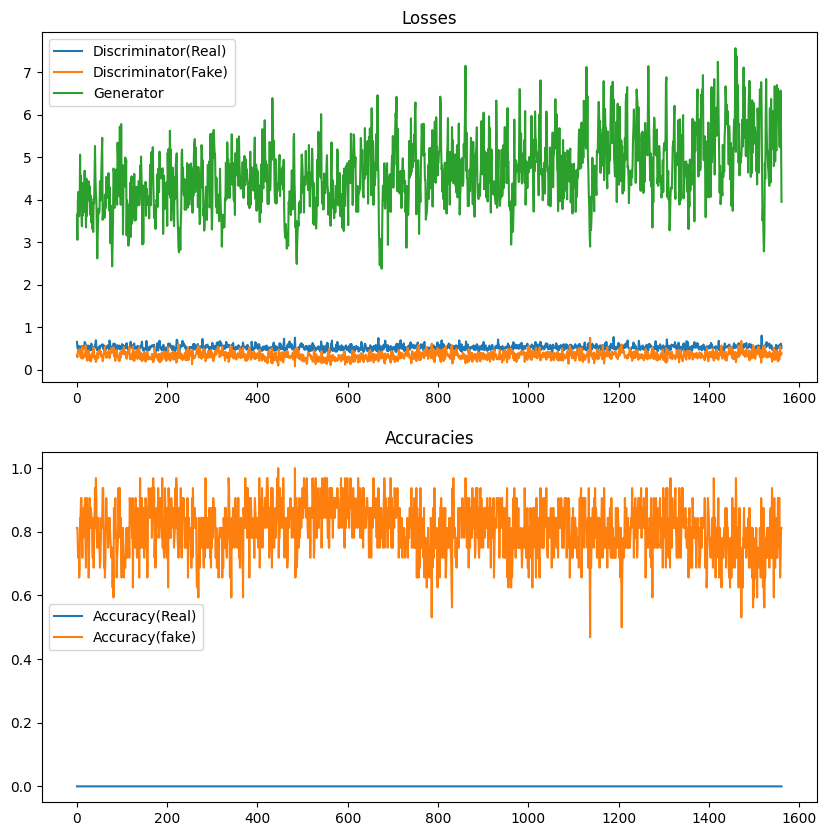

Iteration: 3
[[[9.9989891e-01]
  [1.0000000e+00]
  [1.0000000e+00]
  [0.0000000e+00]
  [3.1139871e-12]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]]]
[[0.33676532]]


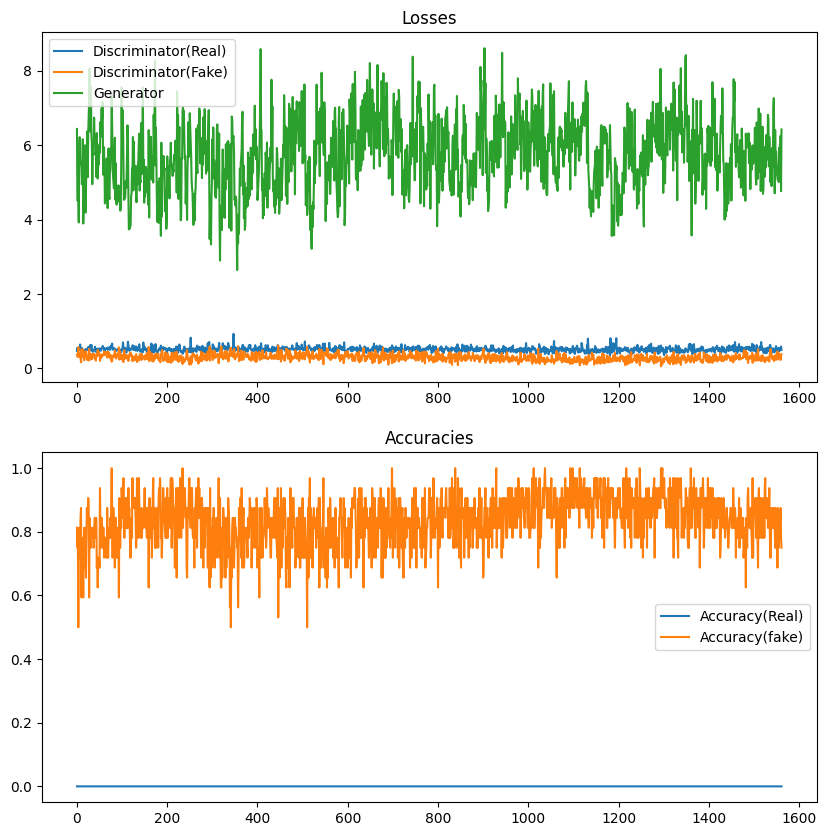

Iteration: 4
[[[1.0000000e+00]
  [1.0000000e+00]
  [1.0000000e+00]
  [2.2708629e-15]
  [1.2593794e-27]
  [5.0051632e-22]
  [1.0000000e+00]
  [1.0000000e+00]
  [6.3837888e-03]
  [1.0000000e+00]
  [1.0000000e+00]]]
[[0.21708633]]


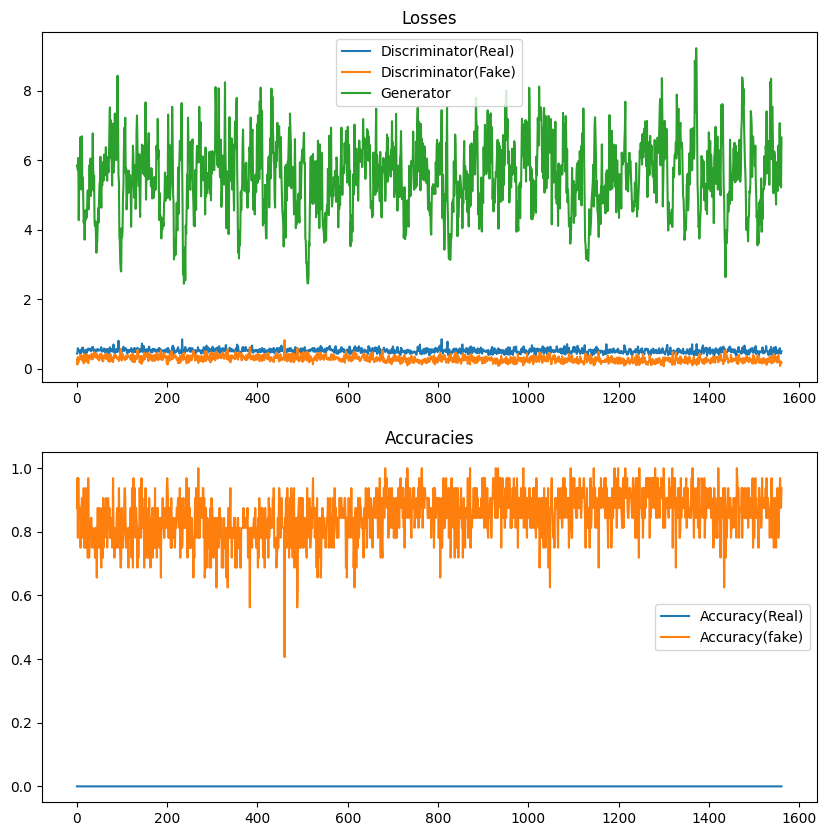

In [9]:
tf.keras.utils.disable_interactive_logging()
gan.train(epochs=5)

In [23]:
x = gan.generator.predict(np.random.normal(0, 1, (10000, 5)))


In [24]:
x, _ = gan.generate_real_samples_true(10000)
nset = set()
for i in range(1024):
    nset.add(tuple(x[i].reshape(-1)[:11].astype(int)))
# print(len(nset))
for x in nset:
    print(x)
    break

(1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1)


In [25]:
print(len(nset))

1024


In [26]:
x = gan.generator.predict(np.random.normal(0, 1, (10000, 50)))
i = 0
for l in x:
    # print(l)
    l = l.reshape(-1)
    l = np.rint(l).astype(int)
    l = l[:11]
    l = tuple(l)
    # print(l)
    # break
    
    if l in nset:
        # print(l, l in nset)
        # break
        i+=1
print(i)

5029


In [16]:
print(x[0])

[[1.0000000e+00]
 [1.0000000e+00]
 [9.8730415e-01]
 [3.3800678e-37]
 [1.0000000e+00]
 [2.1120930e-10]
 [0.0000000e+00]
 [1.0000000e+00]
 [2.6672882e-05]
 [8.5235549e-38]
 [1.0000000e+00]]
